In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\ASUS\Downloads\diabetes.csv")

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
sc=StandardScaler()

In [6]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [7]:
X=df.drop(columns='Outcome')
y=df['Outcome']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
X_train.shape

(614, 8)

In [9]:
X_test.shape

(154, 8)

In [10]:
y_train.shape

(614,)

In [11]:
y_test.shape

(154,)

In [12]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26
106,1,96,122,0,0,22.4,0.207,27
270,10,101,86,37,0,45.6,1.136,38
435,0,141,0,0,0,42.4,0.205,29


In [13]:
X_train=sc.fit_transform(X_train)

In [14]:
X_train

array([[-0.52639686, -1.15139792, -3.75268255, ..., -4.13525578,
        -0.49073479, -1.03594038],
       [ 1.58804586, -0.27664283,  0.68034485, ..., -0.48916881,
         2.41502991,  1.48710085],
       [-0.82846011,  0.56687102, -1.2658623 , ..., -0.42452187,
         0.54916055, -0.94893896],
       ...,
       [ 1.8901091 , -0.62029661,  0.89659009, ...,  1.76054443,
         1.981245  ,  0.44308379],
       [-1.13052335,  0.62935353, -3.75268255, ...,  1.34680407,
        -0.78487662, -0.33992901],
       [-1.13052335,  0.12949347,  1.43720319, ..., -1.22614383,
        -0.61552223, -1.03594038]])

In [15]:
X_test=sc.transform(X_test)

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
param_gridzzz={'penalty':['l1','l2','elasticnet'],'C':list(np.linspace(0,1,15))}

In [18]:
from sklearn.metrics import accuracy_score,roc_curve

In [19]:
lr=LogisticRegression()
g=GridSearchCV(lr,param_grid=param_gridzzz,cv=10,scoring='accuracy')

In [20]:
g.fit(X_train,y_train)

G:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
310 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "G:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "G:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1160, in fit
    self._validate_params()
  File "G:\anaconda\lib\site-packages\sklearn\base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "G:\anaconda\lib\site-packages\sklearn\utils\_param_validation.py", line 97, in valid

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.0, 0.07142857142857142, 0.14285714285714285,
                               0.21428571428571427, 0.2857142857142857,
                               0.3571428571428571, 0.42857142857142855, 0.5,
                               0.5714285714285714, 0.6428571428571428,
                               0.7142857142857142, 0.7857142857142857,
                               0.8571428571428571, 0.9285714285714285, 1.0],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [21]:
g.best_params_

{'C': 0.9285714285714285, 'penalty': 'l2'}

In [22]:
g.best_score_

0.7654151242728715

In [23]:
log=LogisticRegression(C=0.9285714285714285, penalty='l2',max_iter=1000)

In [24]:
log.fit(X_train,y_train)

LogisticRegression(C=0.9285714285714285, max_iter=1000)

In [25]:
y_pred=log.predict(X_test)

In [26]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [27]:
accuracy_score(y_test,y_pred)

0.7532467532467533

In [28]:
fpr,tpr,th=roc_curve(y_test,y_pred)

In [29]:
th

array([2, 1, 0], dtype=int64)

In [30]:
fpr

array([0.       , 0.2020202, 1.       ])

In [31]:
tpr

array([0.        , 0.67272727, 1.        ])

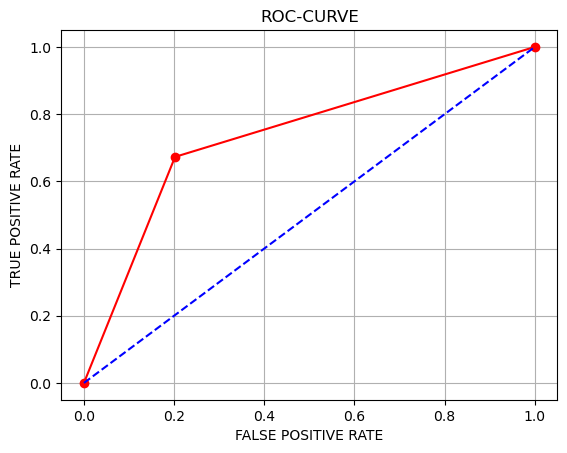

In [32]:
plt.plot(fpr,tpr,'-o',color='red')
plt.title('ROC-CURVE')
plt.plot(np.linspace(0,1,10),np.linspace(0,1,10),color='blue',linestyle='--')
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.grid()
plt.show()

In [33]:
optimal_threshold=th[np.argmax(tpr-fpr)]

In [34]:
optimal_threshold

1

In [35]:
from sklearn.svm import SVC

In [47]:
s=SVC(kernel='rbf',probability=True)

In [42]:
X_T,X_t,y_T,y_t=train_test_split(X,y,test_size=0.2,random_state=0)

In [43]:
X_T=sc.fit_transform(X_T)

In [44]:
X_T.shape

(614, 8)

In [45]:
X_t.shape

(154, 8)

In [46]:
X_t=sc.transform(X_t)

In [48]:
s.fit(X_T,y_T)

SVC(probability=True)

In [49]:
probabilities=s.predict_proba(X_t)

In [51]:
p=probabilities[:,1]

In [52]:
svm_fpr,svm_tpr,svm_th=roc_curve(y_test,p)

In [54]:
from sklearn.metrics import roc_auc_score
svm_auc=roc_auc_score(y_test,p)

In [55]:
svm_auc

0.5500459136822774

In [56]:
svm_th

array([1.9640466 , 0.9640466 , 0.87622756, 0.87579483, 0.84506312,
       0.82345099, 0.82087531, 0.82000972, 0.81117701, 0.80999642,
       0.76103692, 0.75058393, 0.71857642, 0.70757031, 0.67640131,
       0.57564725, 0.56918074, 0.51710466, 0.51152759, 0.49434943,
       0.42883275, 0.40946372, 0.39122255, 0.3810496 , 0.36634323,
       0.35875478, 0.34313442, 0.34048713, 0.28462202, 0.28357229,
       0.2820423 , 0.25640526, 0.2404063 , 0.22986514, 0.22225241,
       0.22074323, 0.21722415, 0.19825745, 0.19487597, 0.1881226 ,
       0.18403951, 0.18345923, 0.17754798, 0.1757861 , 0.17001172,
       0.16843119, 0.16808884, 0.16529358, 0.16037418, 0.15906134,
       0.14938686, 0.14892095, 0.14576673, 0.13868682, 0.12888776,
       0.12811855, 0.12659711, 0.12415843, 0.11966813, 0.11783643,
       0.11400343, 0.1099481 , 0.0891857 , 0.08863526, 0.08476953,
       0.08175083, 0.08024469, 0.07154013, 0.06105397])

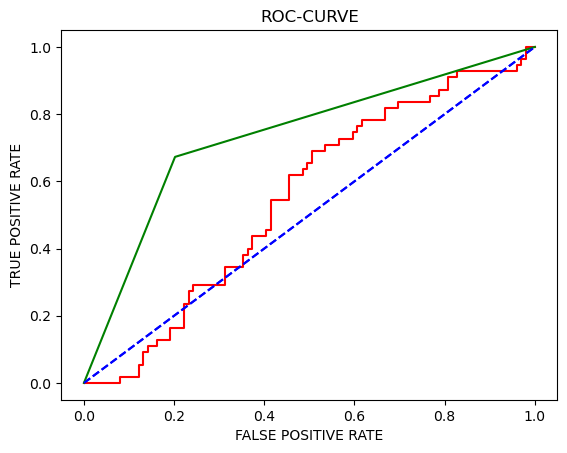

In [61]:
plt.plot(svm_fpr,svm_tpr,'-',color='red')
plt.title('ROC-CURVE')
plt.plot(np.linspace(0,1,10),np.linspace(0,1,10),color='blue',linestyle='--')
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.grid()

plt.plot(fpr,tpr,'-',color='green')
plt.title('ROC-CURVE')
plt.plot(np.linspace(0,1,10),np.linspace(0,1,10),color='blue',linestyle='--')
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.grid()
plt.show()
plt.show()